#### 라이브러리 호출 및 설정

In [7]:
import pandas as pd

# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)

#### 데이터 로드

In [8]:
from datasets import load_dataset

dataset = load_dataset("ohilikeit/empathetic_dialogues_kr")
train_val = dataset["train"].train_test_split(test_size=200, shuffle=True, seed=42)
train_dataset = train_val["train"].shuffle()
eval_dataset = train_val["test"].shuffle()
train = train_dataset.to_pandas()
eval = eval_dataset.to_pandas()

Found cached dataset json (/opt/ml/.cache/huggingface/datasets/ohilikeit___json/ohilikeit--empathetic_dialogues_kr-13111489bbb4f8dc/0.0.0/8bb11242116d547c741b2e8a1f18598ffdd40a1d4f2a2872c7a28b697434bc96)
100%|██████████| 1/1 [00:00<00:00, 390.17it/s]
Loading cached split indices for dataset at /opt/ml/.cache/huggingface/datasets/ohilikeit___json/ohilikeit--empathetic_dialogues_kr-13111489bbb4f8dc/0.0.0/8bb11242116d547c741b2e8a1f18598ffdd40a1d4f2a2872c7a28b697434bc96/cache-3979cc333e09942d.arrow and /opt/ml/.cache/huggingface/datasets/ohilikeit___json/ohilikeit--empathetic_dialogues_kr-13111489bbb4f8dc/0.0.0/8bb11242116d547c741b2e8a1f18598ffdd40a1d4f2a2872c7a28b697434bc96/cache-67b534a795ba3840.arrow


#### source / type column의 분포

In [9]:
from eda import *

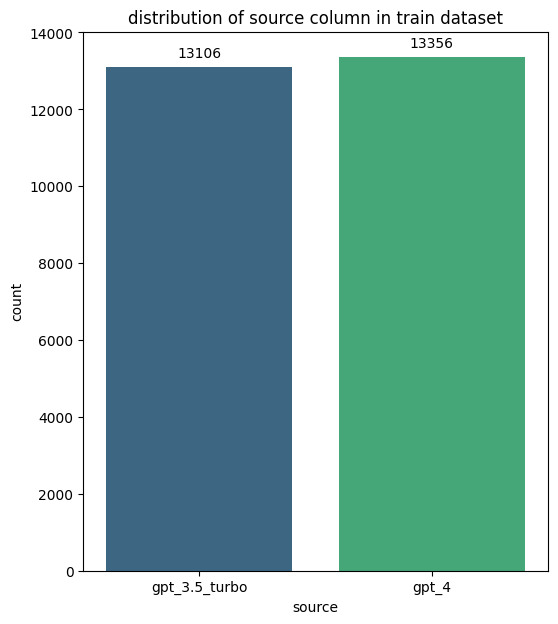

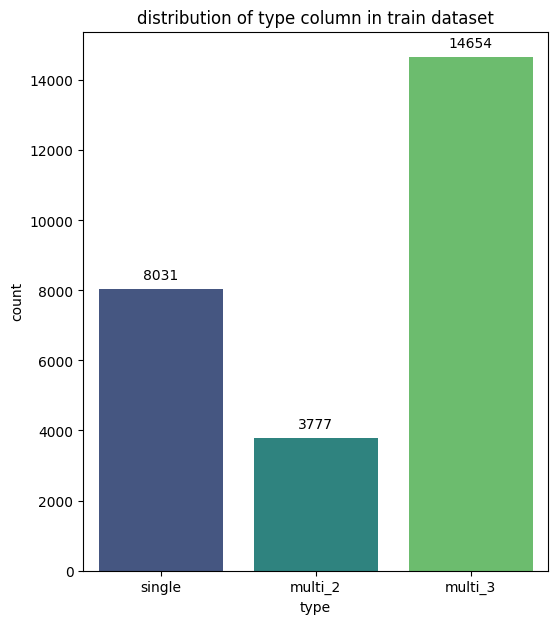

<Figure size 300x200 with 0 Axes>

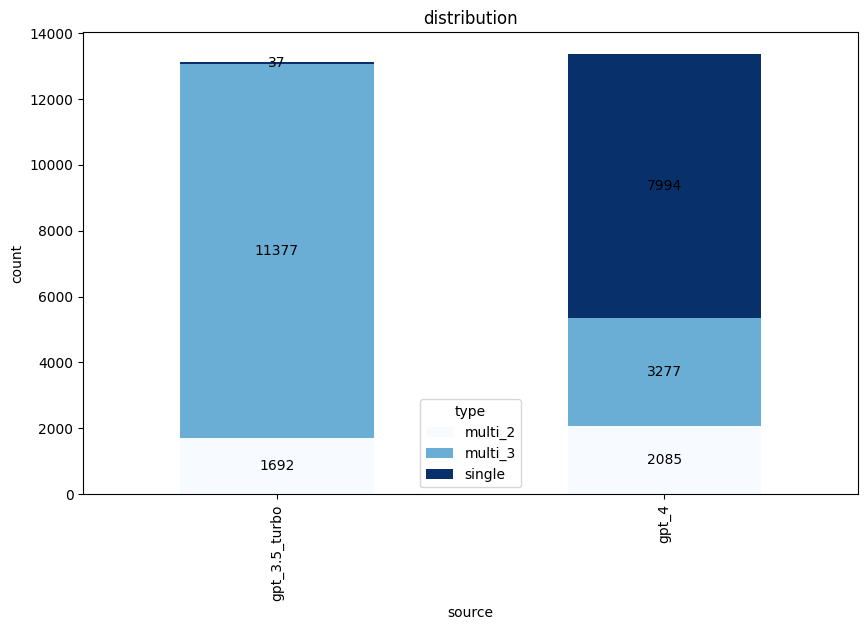

<Figure size 300x200 with 0 Axes>

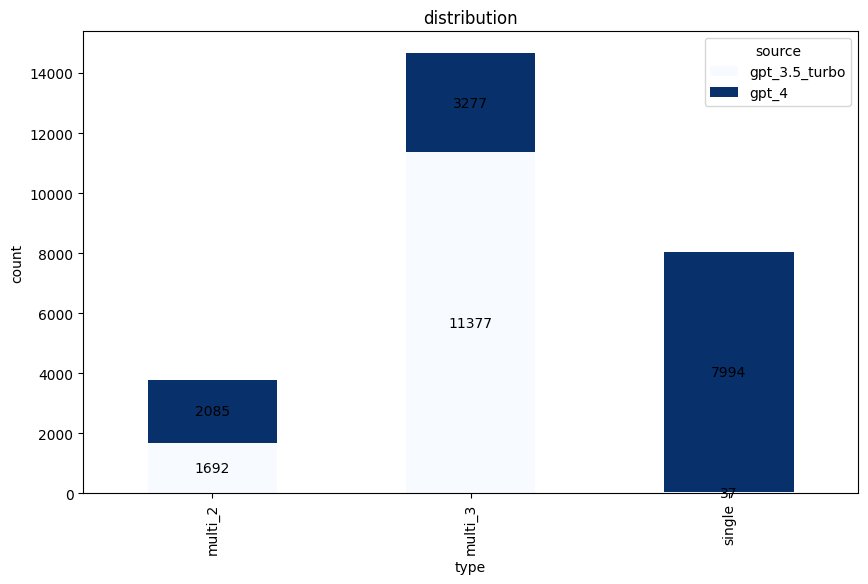

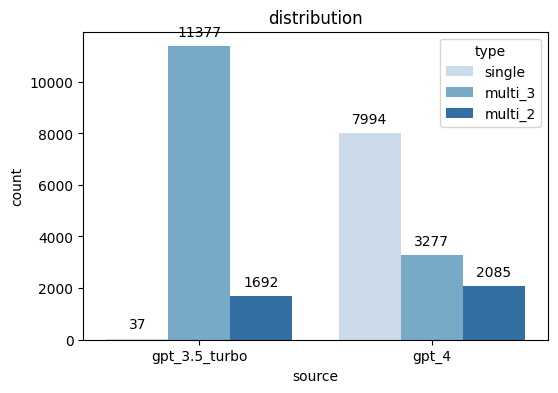

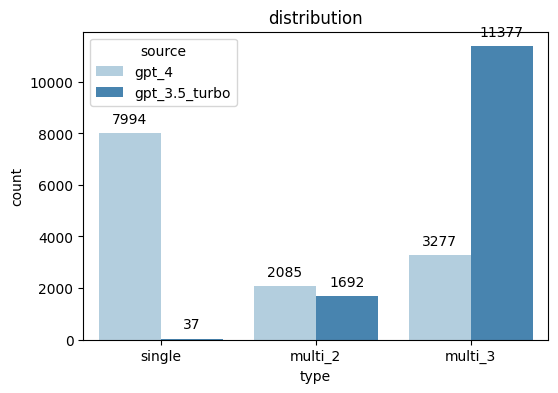

In [10]:
barplot(train, "source", ['gpt_3.5_turbo', 'gpt_4'], title="distribution of source column in train dataset")
barplot(train, "type", ['single', 'multi_2', 'multi_3'], title="distribution of type column in train dataset")

pivot_barplot(train, "source", "type", ['gpt_3.5_turbo', 'gpt_4'])
pivot_barplot(train, "type", "source", ['single', 'multi_2', 'multi_3'])

dual_barplot(train, "source", "type", ['gpt_3.5_turbo', 'gpt_4'])
dual_barplot(train, "type", "source", ['single', 'multi_2', 'multi_3'])

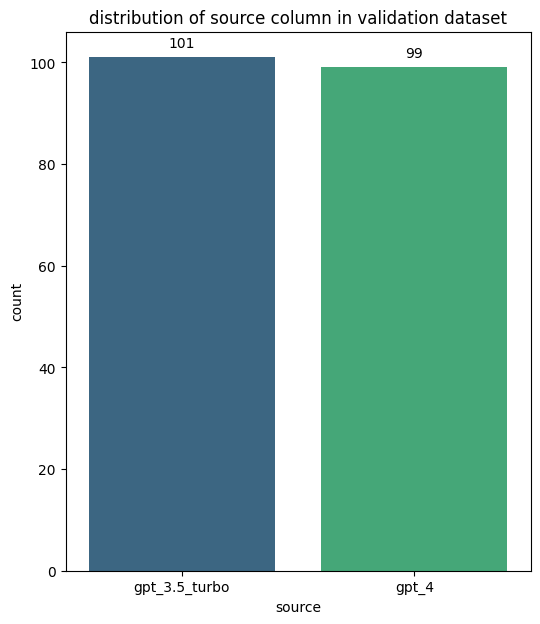

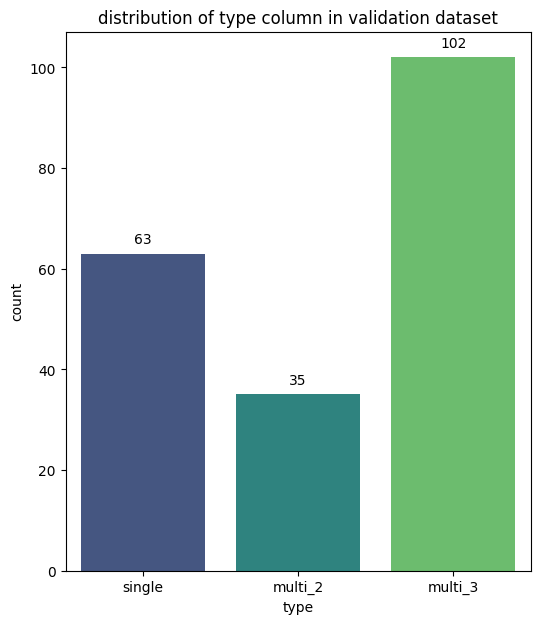

<Figure size 300x200 with 0 Axes>

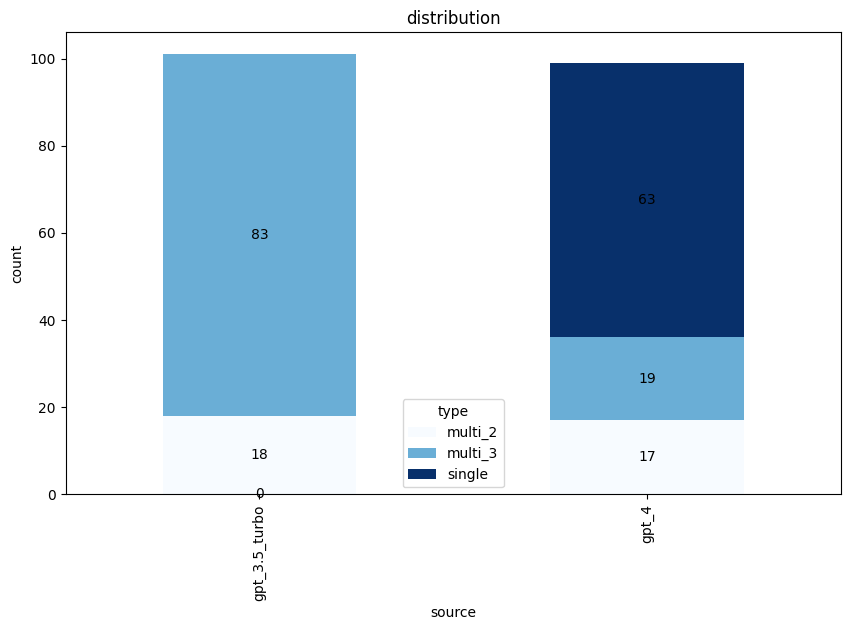

<Figure size 300x200 with 0 Axes>

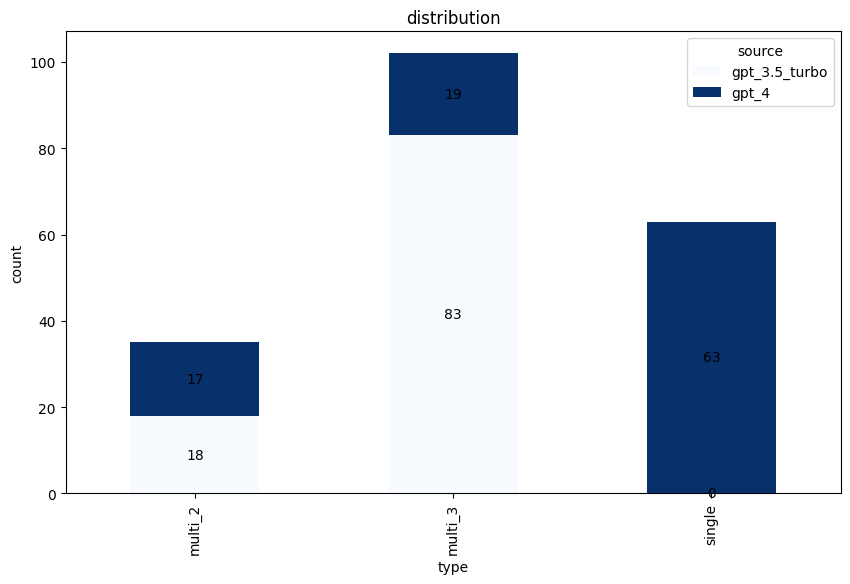

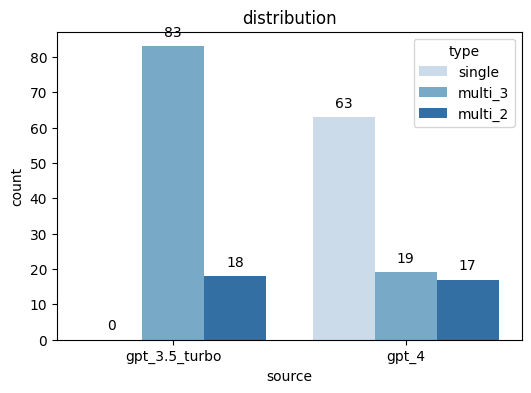

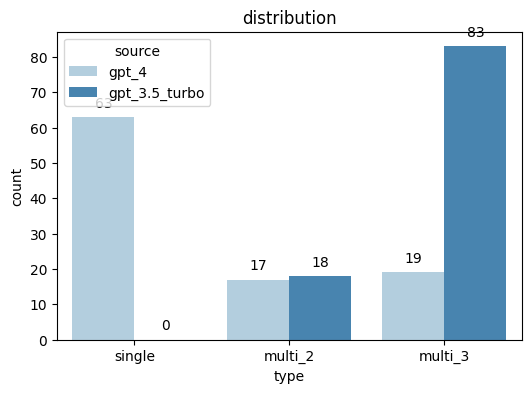

In [11]:
barplot(eval, "source", ['gpt_3.5_turbo', 'gpt_4'], title="distribution of source column in validation dataset")
barplot(eval, "type", ['single', 'multi_2', 'multi_3'], title="distribution of type column in validation dataset")

pivot_barplot(eval, "source", "type", ['gpt_3.5_turbo', 'gpt_4'])
pivot_barplot(eval, "type", "source", ['single', 'multi_2', 'multi_3'])

dual_barplot(eval, "source", "type", ['gpt_3.5_turbo', 'gpt_4'])
dual_barplot(eval, "type", "source", ['single', 'multi_2', 'multi_3'])

### 문장 길이 분포

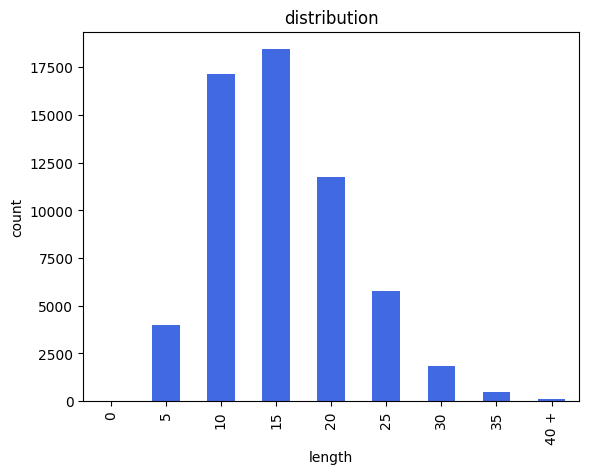

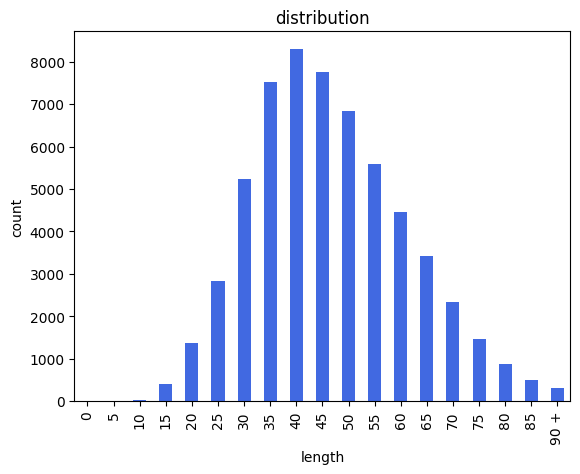

In [12]:
train_user_df, train_chatbot_df = text_length(train)

barplot_binning(train_user_df['length'], "length", "distribution", range(0, 50, 5))
barplot_binning(train_chatbot_df['length'], "length", "distribution", range(0, 100, 5))

In [13]:
train_user_df.describe()

,length
count,59544.00000
mean,17.55087
std,6.18150
min,4.00000
25%,13.00000
50%,17.00000
75%,21.00000
max,54.00000


In [14]:
train_chatbot_df.describe()

,length
count,59553.000000
mean,48.839118
std,15.119546
min,0.000000
25%,38.000000
50%,47.000000
75%,58.000000
max,141.000000


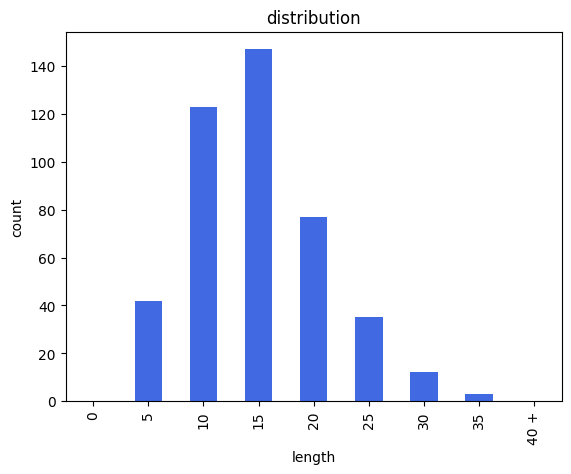

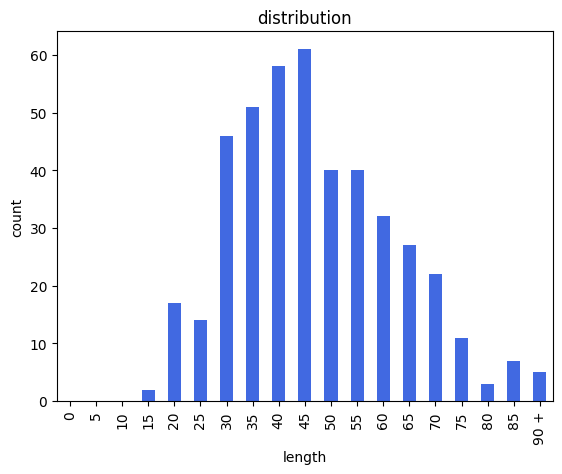

In [15]:
eval_user_df, eval_chatbot_df = text_length(eval)

barplot_binning(eval_user_df['length'], "length", "distribution", range(0, 50, 5))
barplot_binning(eval_chatbot_df['length'], "length", "distribution", range(0, 100, 5))

In [16]:
eval_user_df.describe()

,length
count,439.000000
mean,16.888383
std,5.985052
min,5.000000
25%,13.000000
50%,16.000000
75%,20.000000
max,36.000000


In [17]:
eval_chatbot_df.describe()

,length
count,439.000000
mean,49.364465
std,16.116279
min,18.000000
25%,38.000000
50%,47.000000
75%,59.500000
max,111.000000


In [18]:
word_count_user = count_words(train_user_df['user_text'])
word_count_user

JVMNotFoundException: No JVM shared library file (libjvm.so) found. Try setting up the JAVA_HOME environment variable properly.

In [ ]:
word_count_chatbot = count_words(train_chatbot_df['chatbot_text'])
word_count_chatbot

Counter({'.': 117800,
         '을': 98311,
         '?': 65367,
         '이': 64840,
         '를': 46055,
         '것': 43692,
         '수': 41189,
         ',': 39942,
         '어떤': 33791,
         '에': 32309,
         '은': 30146,
         '정말': 22422,
         '방법': 21665,
         '요': 20953,
         '가': 19274,
         '의': 19137,
         '있어요': 18565,
         '하는': 18353,
         '도': 16766,
         '는': 16262,
         '들': 15704,
         '하고': 14240,
         '에서': 13523,
         '스트레스': 12969,
         '건': 12962,
         '과': 12908,
         '!': 12670,
         '좋은': 12215,
         '거': 12158,
         '일이': 12128,
         '적': 11487,
         '친구': 11253,
         '할': 10451,
         '에요': 10444,
         '때': 9986,
         '있는': 9840,
         '이에요': 9827,
         '있을까요': 9789,
         '일': 9607,
         '생각': 9559,
         '시간': 9448,
         '도움': 9414,
         '상황': 9206,
         '예요': 8907,
         '더': 8506,
         '그런': 8170,
         '으로': 810